# Problem Statement: Lend or Lose



Team Name: Nangara

# Contributors
1)Ullas G - IMT2022125
2)Mallikarjun Chakoti - IMT2022116
3)Adithya Nangarath - IMT2022024

We tried out multiple models to predict 'Default' Feature in the test dataset.Basic preprocessing is done in the beginning. For some of the models we tried out adding different features which might enhance the accuracy, so those specific preprocessing steps are done in respective cells.Our best performing model was 'XGBoost'(Last cell). Each cell has complete setups from train-test split to writing to csv file. So after running the first few blocks upto pre-processing ,You can run the specific block you want to independently run and use that model ,for using any model explicitly first you need to preprocess and then run the model and again to run next model run preprocessing steps and run the model.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#Imported Basic Libraries first

# Reading Train and Test Datasets

In [8]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data #Can see the training dataset below

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,KYS1HKNGGE,40,116623,161673,651,79,2,23.44,12,0.87,Bachelor's,Part-time,Divorced,No,No,Home,Yes,0
204273,5MAOH3AOZO,67,62958,189499,460,77,3,9.29,36,0.11,Bachelor's,Self-employed,Single,No,No,Business,Yes,0
204274,5Y9Z6NW29X,62,34372,59645,524,94,3,9.72,60,0.24,PhD,Full-time,Single,Yes,No,Auto,No,0
204275,O51974F566,44,146262,198454,489,7,4,4.31,48,0.30,High School,Self-employed,Married,Yes,No,Home,No,0


# Initial Preprocessing

1. Checking for null values

In [9]:
#CHecking for null values
print(train_data.isna().sum())
print(test_data.isna().sum())
#Both the training nad the testing dataset have no null values 

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64


2. Detecting and removing outliers

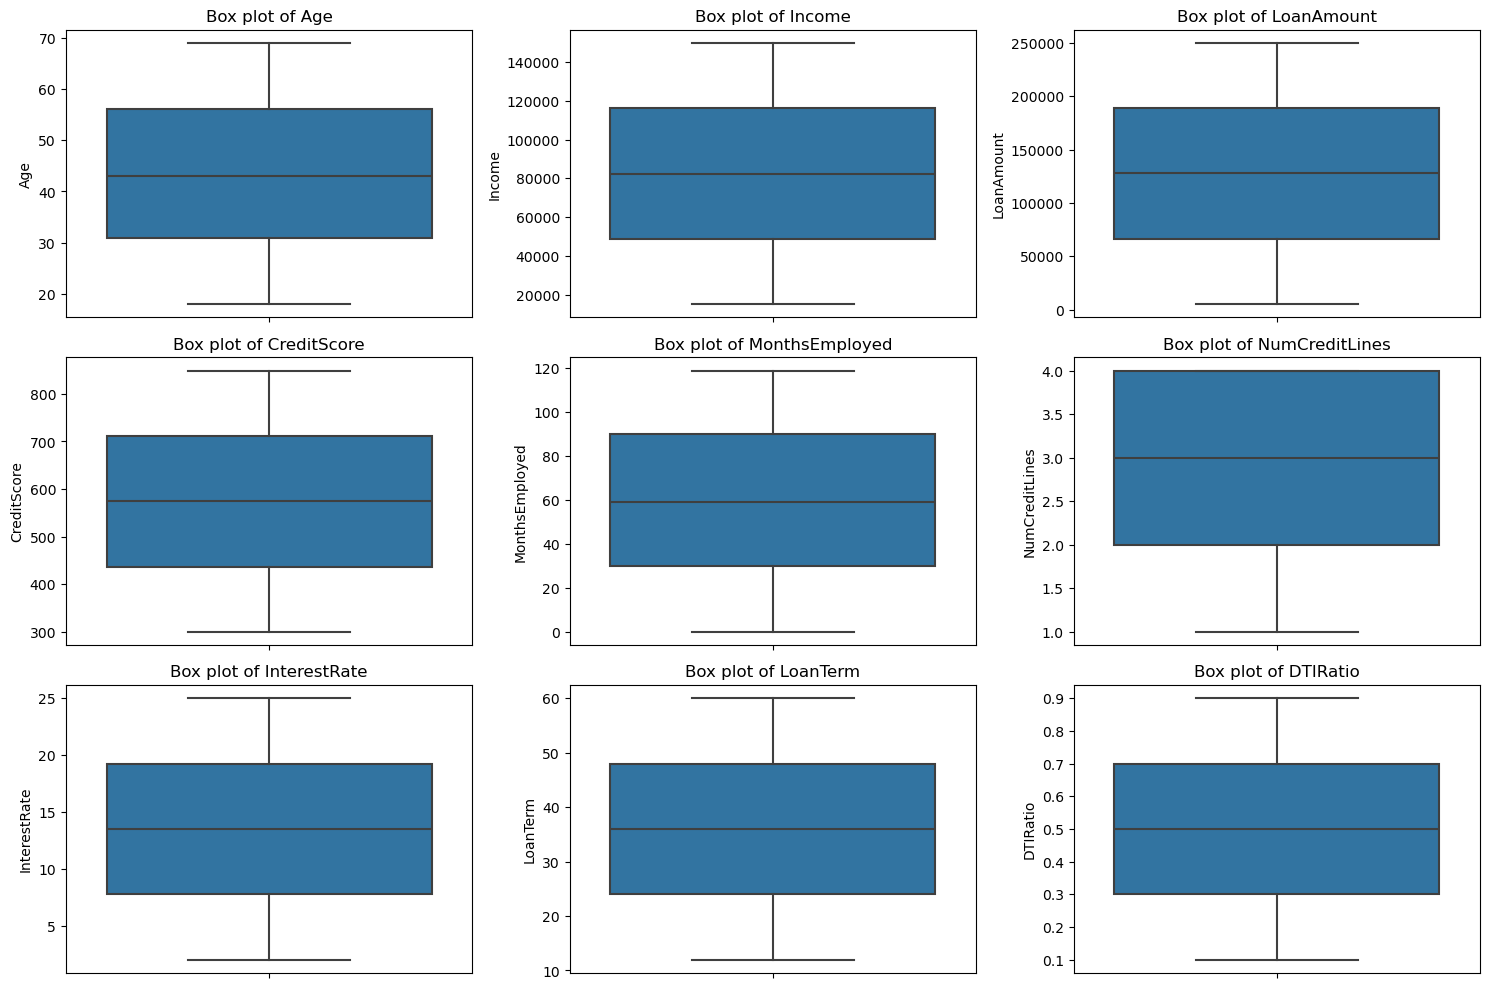

In [10]:
#Box plot of all numerical columns 

numeric_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Subplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=train_data, y=col)
    plt.title(f'Box plot of {col}')
    

plt.tight_layout()
plt.show()
#As you can see below ,all the numerical columns are withing a certain decent Range. 
#There are no outliers , in any one of the numerical columns which should be handled specifically.


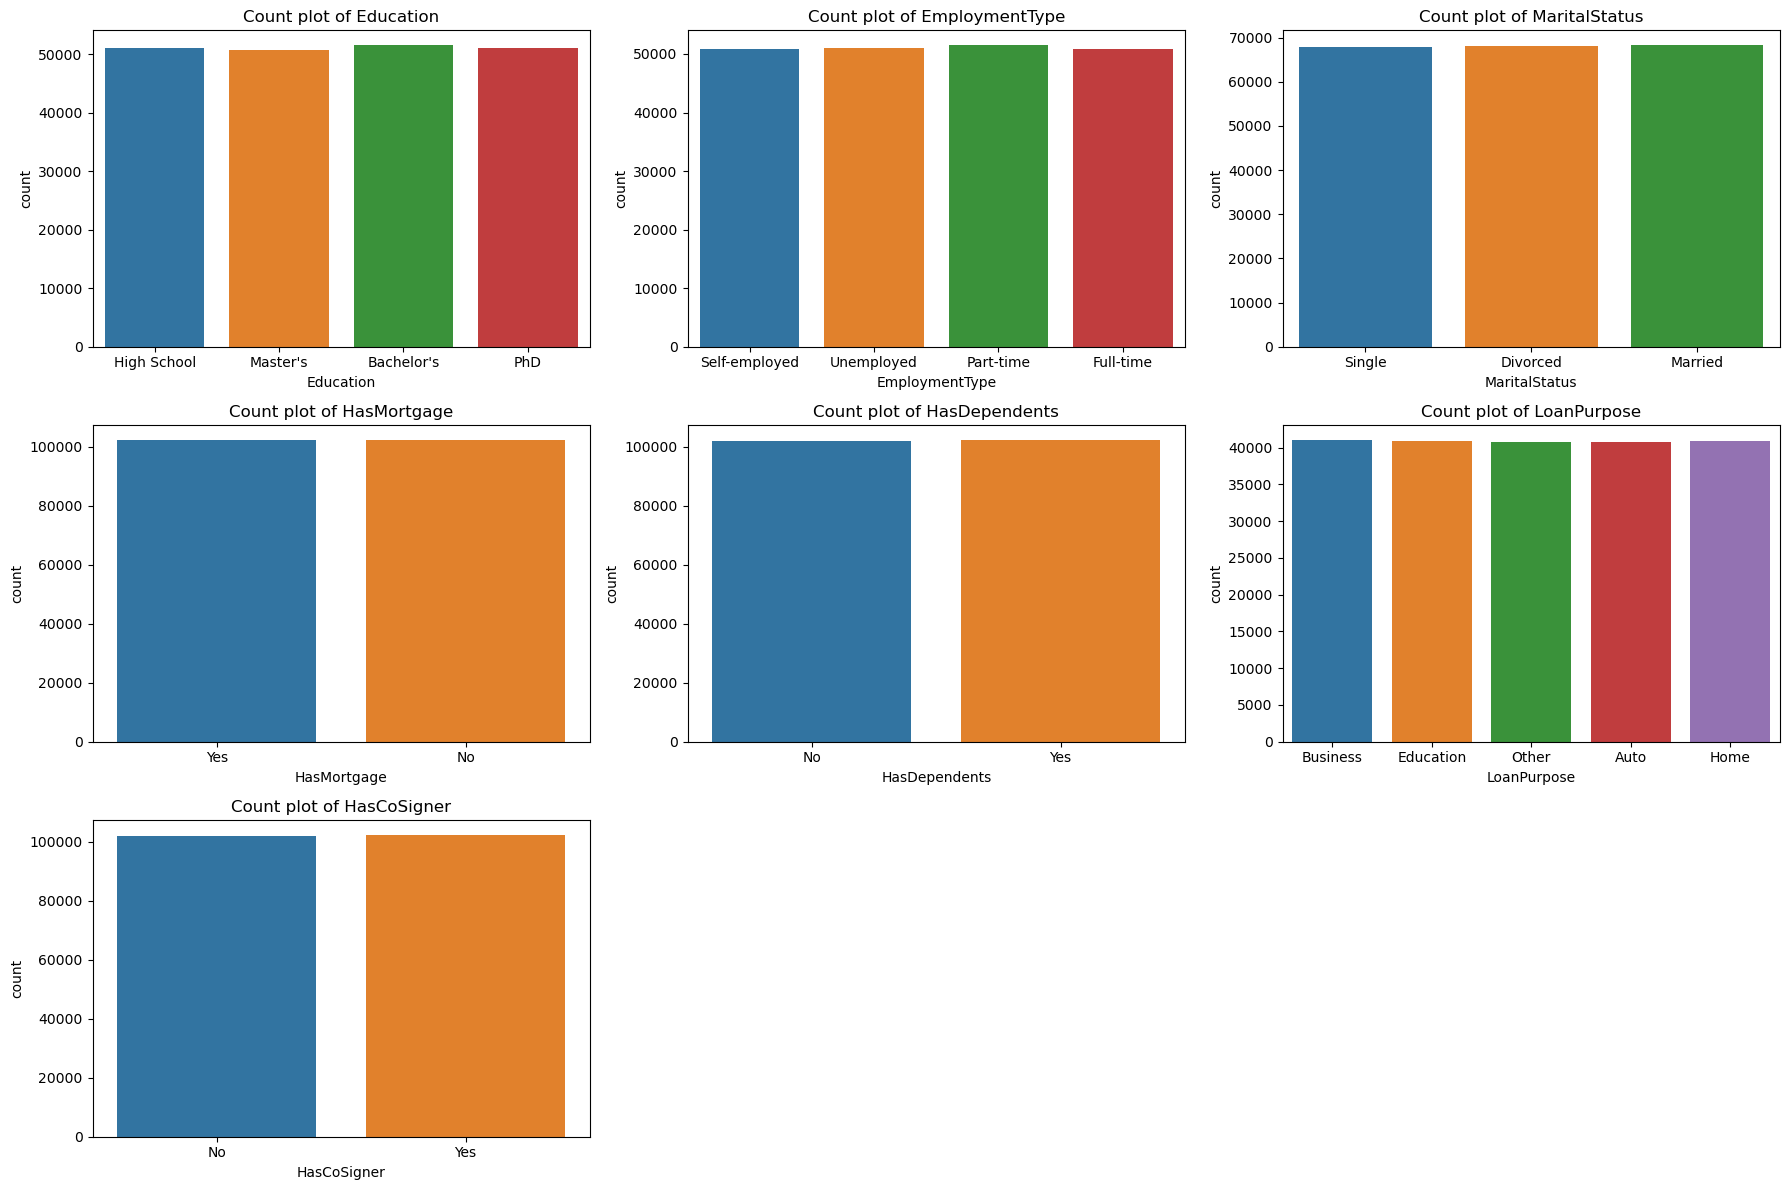

In [11]:
#Checking categorical variables
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=train_data, x=col)
    plt.title(f'Count plot of {col}')

plt.tight_layout()
plt.show()

#below you can see the count plot for all the categories of each categorical Column in the dataset.
#We can see that in each feature there is no such category which is dominant(Very high count as compared to others) or inferior(very less count as compared to others)

In [12]:
train_data = train_data.drop_duplicates()
#Removing duplicate rows

# Model -1 : Random Forest Classifier with defualt parameters


Tried using pipeline for paralell processsing but took a lot of time in my system. Hence didn't use it for further models

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline  #tried pipeline for parallel processing


# Drop unnecessary columns
train_data = train_data.drop(columns=["LoanID"])
test_ids = test_data["LoanID"]
test_df = test_data.drop(columns=["LoanID"])
X = train_data.drop(columns=["Default"])
y = train_data["Default"]

# Tried out differnt combinations of splitting categorical varibales into ordinal and nominal
#Majorly tried 1) All in ordinal,2)'Marital Status' in nominal and all others in ordinal,3)Education and marital status in nominal and all others in ordinal

nominal_features = [ ]
ordinal_features = ["MaritalStatus","EmploymentType", "HasMortgage", "HasDependents", "HasCoSigner","Education","LoanPurpose"]
numerical_features = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio"]

#Preprocessing pipeline for nominal features (one-hot encode)
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

#Preprocessing pipeline for ordinal features (ordinal encode)
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

# Combining Both
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', nominal_transformer, nominal_features),
        ('ordinal', ordinal_transformer, ordinal_features)
    ],
    remainder='passthrough'
)

#Random forest classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=125))
])

# Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=125)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
test_predictions = model.predict(test_df)

# Writing to csv
submission = pd.DataFrame({'LoanID': test_ids, 'Default': test_predictions})
submission.to_csv("submission_rf.csv", index=False)
print("Random Forest predictions saved to submission_rf.csv")


Validation Accuracy: 0.8850352457411396
Random Forest predictions saved to submission_rf.csv


# Model-2 : Random Forest Classifier with best parameters

In [14]:
print(train_data.columns)

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pandas as pd

# Split features and target variable for training data
X = train_data.drop(['LoanID', 'Default'], axis=1)
y = train_data['Default']

# Retain LoanID for the test data to include it in the submission file later
X_test = test_data.drop(['LoanID'], axis=1)
test_ids = test_data['LoanID']

# Feature categorization
nominal_features = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
ordinal_features = ['HasMortgage', 'HasDependents', 'HasCoSigner']

# Preprocessor for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), nominal_features),
        ('ordinal', OrdinalEncoder(), ordinal_features)
    ],
    remainder='passthrough'  # Numerical features remain unchanged
)

# Define the pipeline with a Random Forest classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=125))
])

# Parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=125)
best_model.fit(X_train, y_train)
y_pred_val = best_model.predict(X_val)

# Validation accuracy
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))

# Predictions for the test dataset
test_predictions = best_model.predict(X_test)

# Create a submission file
submission = pd.DataFrame({'LoanID': test_ids, 'Default': test_predictions})
submission.to_csv('submission.csv', index=False)


# Model-3: Random Forest Classifier with a New Feature- EmploymentLoanRatio

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Created New feature hoping for better result  but did no t improve accuracy
#Also tried LoantoCredit Ratio(new feature ) but did not help
train_data['EmploymentLoanRatio'] = train_data['MonthsEmployed'] / train_data['LoanTerm']
test_data['EmploymentLoanRatio'] = test_data['MonthsEmployed'] / test_data['LoanTerm']

# Define feature and target variables
X = train_data.drop(['LoanID', 'Default'], axis=1)
y = train_data['Default']
X_test = test_data.drop(['LoanID'], axis=1)

#Encoding
nominal_features = ['MaritalStatus']
ordinal_features = ['HasMortgage', 'HasDependents', 'HasCoSigner','Education', 'EmploymentType', 'LoanPurpose']
numeric_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
                    'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'EmploymentLoanRatio']
#Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ordinal_features),
        ('ordinal', OrdinalEncoder(), nominal_features),
        ('num', 'passthrough', numeric_features)
    ]
)

#Model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=125))
])

#Train-test split 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=125)

#Training and validation
pipeline.fit(X_train, y_train)
y_pred_val = pipeline.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
test_predictions = pipeline.predict(X_test)
submission = pd.DataFrame({'LoanID': test_data['LoanID'], 'Default': test_predictions})
submission.to_csv('submission_rf_default.csv', index=False)

KeyError: "['LoanID'] not found in axis"

# Model-4: K- Nearest neighbours

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score

#Created some more new features as seen here and after trial and error these 4 provided the best Result
train_data['LoanIncomeRatio'] = train_data['LoanAmount'] / train_data['Income']  #Repeated but here it is calculated , unlike the one which is given
train_data['EmploymentLoanRatio'] = train_data['MonthsEmployed'] / train_data['LoanTerm']
train_data['CreditUtilization'] = train_data['LoanAmount'] / train_data['CreditScore']
train_data['IncomeStability'] = train_data['Income'] / train_data['Age']
test_data['LoanIncomeRatio'] = test_data['LoanAmount'] / test_data['Income']
test_data['EmploymentLoanRatio'] = test_data['MonthsEmployed'] / test_data['LoanTerm']
test_data['CreditUtilization'] = test_data['LoanAmount'] / test_data['CreditScore']
test_data['IncomeStability'] = test_data['Income'] / test_data['Age']

#Dropping loan id and default as done previously
X = train_data.drop(['LoanID', 'Default'], axis=1)
y = train_data['Default']
X_test = test_data.drop(['LoanID'], axis=1)

#Splitting Features for encoding caategorical features and using numerical features as it is
nominal_features = ['MaritalStatus']
ordinal_features = ['HasMortgage', 'HasDependents', 'HasCoSigner', 'Education', 'EmploymentType', 'LoanPurpose']
numeric_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
                    'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'LoanIncomeRatio', 'EmploymentLoanRatio', 'CreditUtilization', 'IncomeStability']

onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
ordinal_encoder = OrdinalEncoder()
#Encoding
X_ordinal_encoded = onehot_encoder.fit_transform(X[ordinal_features])
X_test_ordinal_encoded = onehot_encoder.transform(X_test[ordinal_features])
X_nominal_encoded = ordinal_encoder.fit_transform(X[nominal_features])
X_test_nominal_encoded = ordinal_encoder.transform(X_test[nominal_features])

#All features below in a dataframe
X_encoded = pd.concat([
    pd.DataFrame(X_ordinal_encoded), 
    pd.DataFrame(X_nominal_encoded), 
    X[numeric_features].reset_index(drop=True)
], axis=1)

X_test_encoded = pd.concat([
    pd.DataFrame(X_test_ordinal_encoded), 
    pd.DataFrame(X_test_nominal_encoded), 
    X_test[numeric_features].reset_index(drop=True)
], axis=1)

X_encoded.columns = X_encoded.columns.astype(str)
X_test_encoded.columns = X_test_encoded.columns.astype(str)

#Scaling numerical features as knn is a distance based algorithm and scaling helps
scaler = StandardScaler()
X_encoded[numeric_features] = scaler.fit_transform(X_encoded[numeric_features])
X_test_encoded[numeric_features] = scaler.transform(X_test_encoded[numeric_features])

#Train-test split 
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=125)

#Hyperparameter tuning 
param_grid = {'n_neighbors': range(5, 13)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print(f"Best k: {best_k}")
print(f"Best cross-validation accuracy: {best_score}")

#Using the best Knn Model
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_val = knn_best.predict(X_val)
print("Validation Accuracy with best k:", accuracy_score(y_val, y_pred_val))


KeyError: "['LoanID'] not found in axis"

Using best knn model to predict on test.csv

In [ ]:
#training KNN classifier with the best k =12
knn_final = KNeighborsClassifier(n_neighbors=best_k)  
knn_final.fit(X_encoded, y)

#Predicting on test data
y_test_pred = knn_final.predict(X_test_encoded)
submission = pd.DataFrame({'LoanID': test_data['LoanID'], 'Default': y_test_pred})
submission.to_csv('submission.csv', index=False)

# Model-5 :XGBoost with Best parameters

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#Experimented here with splitting categorical features
#Used the one below, because we felt marital status is the only feature which need not be ordinal for loans
#Hence nominal encoding for it felt right
numeric_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 
                    'LoanTerm', 'DTIRatio']
ordinal_features = ['Education', 'HasMortgage', 'HasDependents', 'HasCoSigner', 'EmploymentType', 'LoanPurpose']
nominal_features = ['MaritalStatus']

X = train_data[numeric_features + ordinal_features + nominal_features]
y = train_data['Default']
X_test = test_data[numeric_features + ordinal_features + nominal_features]

#Encoding Ordinal Categorical Features
ordinal_encoder = OrdinalEncoder()
X[ordinal_features] = ordinal_encoder.fit_transform(X[ordinal_features])
X_test[ordinal_features] = ordinal_encoder.transform(X_test[ordinal_features])

#Encoding Nominal Features

onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
X_nominal_encoded = pd.DataFrame(onehot_encoder.fit_transform(X[nominal_features]), 
                                 columns=onehot_encoder.get_feature_names_out(nominal_features))
X_test_nominal_encoded = pd.DataFrame(onehot_encoder.transform(X_test[nominal_features]), 
                                      columns=onehot_encoder.get_feature_names_out(nominal_features))

# all features in a datafram
X_preprocessed = X[numeric_features].reset_index(drop=True).join(pd.DataFrame(X[ordinal_features]).reset_index(drop=True)).join(X_nominal_encoded)
X_test_preprocessed = X_test[numeric_features].reset_index(drop=True).join(pd.DataFrame(X_test[ordinal_features]).reset_index(drop=True)).join(X_test_nominal_encoded)

#Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=125)

#Selecting the best parameters
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

#Best parameters 
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best Model:", best_model)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/tmp/ipykernel_10477/1183801076.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ordinal_features] = ordinal_encoder.fit_transform(X[ordinal_features])
/tmp/ipykernel_10477/1183801076.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[ordinal_features] = ordinal_encoder.transform(X_test[ordinal_features])
/home/mallikarjun/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:56:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not use

Using the best XGBoost model to predict on Test.csv

In [ ]:
#Using the best xgb model parameters for prediction
from sklearn.metrics import accuracy_score
y_pred_val = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy with best model: {val_accuracy}")

#Predicting on test Dataset
y_test_pred = best_model.predict(X_test_preprocessed)
submission = pd.DataFrame({'LoanID': test_data['LoanID'], 'Default': y_test_pred})
submission.to_csv('submission_xgb_best_model.csv', index=False)